In [1]:
#-ПОДКЛЮЧЕНИЕ-МОДУЛЕЙ-И-БИБЛИОТЕК-
%matplotlib notebook

import numpy              as np
import matplotlib.pyplot  as plt
import moviepy.editor     as mpy00
import scipy
import glob
import nbimporter
import math

from scipy                import sparse
from scipy.sparse         import linalg
from numpy                import pi, sin, cos, ma
from pylab                import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib           import cm
from matplotlib.ticker    import LinearLocator, FormatStrFormatter
from matplotlib           import animation

import SpaceDifferentiationOperators as SD 
import TimeDifferentiationOperators  as TD
import SchemeAnalysis                as SA
import MeshBlocksMethods         as MBM

In [6]:
xmax = 2*pi
sep  = pi
cxl  = 2**4
cxr  = 2**5

tmax = 2*pi
ct   = 2**6

D = SD.SBP42SAT_2BLOCKS(sep/cxl, (xmax-sep)/cxr, cxl+1, cxr+1, 1)
T = TD.RK4(tmax/ct, D)
BI = MBM.Block2Mesh(cxl, cxr, 0, xmax, sep,ct)
BI.DefineIC(sin(BI.blockl.mesh), sin(BI.blockr.mesh))
X,PHI = BI.GetFullSolution()
T.diff(PHI)

<IPython.core.display.Javascript object>


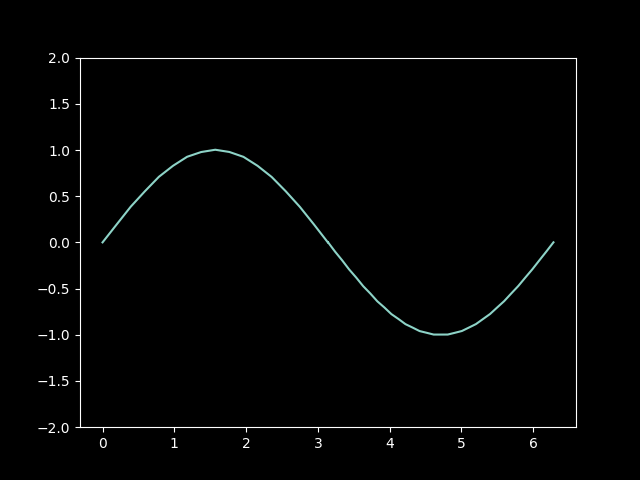

In [7]:
### -ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
surf = ax.plot(X,PHI[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_ylim(-2,2)
    surf = ax.plot(X,PHI[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=ct+1, interval=1, repeat = False)

In [14]:
A = SA.SBPAnalyzer(T,D)
C = SA.ConvAnalyzer('RK4','SBP21SAT_2',1)

In [11]:
A.MassCons(PHI)

array([3.46944695e-17, 2.77555756e-17, 5.89805982e-17, 5.37764278e-17,
       1.38777878e-17, 3.98986399e-17, 1.12757026e-16, 1.73472348e-18,
       5.37764278e-17, 3.29597460e-17, 5.89805982e-17, 2.25514052e-17,
       1.38777878e-17, 8.32667268e-17, 5.55111512e-17, 1.90819582e-17,
       1.73472348e-17, 1.49186219e-16, 8.06646416e-17, 7.02563008e-17,
       4.68375339e-17, 1.20563282e-16, 2.55871713e-17, 2.38524478e-17,
       8.02309608e-17, 6.01223986e-17, 1.99276359e-16, 3.42607887e-17,
       1.15359111e-16, 1.37476835e-16, 1.73472348e-17, 1.21430643e-16,
       1.30104261e-17, 1.94289029e-16, 7.11236625e-17, 5.20417043e-17,
       8.84708973e-17, 9.02056208e-17, 7.11236625e-17, 9.36750677e-17,
       1.04083409e-16, 5.20417043e-18, 3.98986399e-17, 8.67361738e-18,
       6.93889390e-17, 3.12250226e-17, 6.07153217e-17, 2.77555756e-17,
       3.29597460e-17, 7.63278329e-17, 3.81639165e-17, 4.16333634e-17,
       1.04083409e-17, 1.90819582e-17, 1.04083409e-17, 4.68375339e-17,
      

## SIN

In [42]:
xmax = 2*pi
sep  = pi
cxl  = 2**4
cxr  = 2**5

tmax = 2*pi
ct   = 2**5

D = SD.SBP21SAT_2BLOCKS(sep/cxl, (xmax-sep)/cxr, cxl+1, cxr+1, 1)
T = TD.RK4(tmax/ct, D)
BI = MBM.Block2Mesh(cxl, cxr, 0, xmax, sep,ct)
BI.DefineIC(sin(BI.blockl.mesh), sin(BI.blockr.mesh))
X,PHI = BI.GetFullSolution()
T.diff(PHI)
Error1 = PHI[-1] - sin(X)

In [44]:
xmax = 2*pi
sep  = pi
cxl  = 2**5
cxr  = 2**6

tmax = 2*pi
ct   = 2**6

D = SD.SBP21SAT_2BLOCKS(sep/cxl, (xmax-sep)/cxr, cxl+1, cxr+1, 1)
T = TD.RK4(tmax/ct, D)
BI = MBM.Block2Mesh(cxl, cxr, 0, xmax, sep,ct)
BI.DefineIC(sin(BI.blockl.mesh), sin(BI.blockr.mesh))
X,PHI = BI.GetFullSolution()
T.diff(PHI)
Error2 = PHI[-1] - sin(X)

In [37]:
sqrt(Error1@Error1)/sqrt(Error2@Error2)

2.9143109468331816

## Gauss

In [51]:
xmax = 2
sep  = 1
cxl  = 2**4
cxr  = 2**5

tmax = 2
ct   = 2**5

D = SD.SBP21SAT_2BLOCKS(sep/cxl, (xmax-sep)/cxr, cxl+1, cxr+1, 1)
T = TD.RK4(tmax/ct, D)
BI = MBM.Block2Mesh(cxl, cxr, 0, xmax, sep,ct)
BI.DefineIC(exp(-(BI.blockl.mesh-1)**2/0.05), exp(-(BI.blockr.mesh-1)**2/0.05))
X,PHI = BI.GetFullSolution()
T.diff(PHI)
Error1 = PHI[-1] - exp(-(X-1)**2/0.05)

In [52]:
xmax = 2
sep  = 1
cxl  = 2**5
cxr  = 2**6

tmax = 2
ct   = 2**6

D = SD.SBP21SAT_2BLOCKS(sep/cxl, (xmax-sep)/cxr, cxl+1, cxr+1, 1)
T = TD.RK4(tmax/ct, D)
BI = MBM.Block2Mesh(cxl, cxr, 0, xmax, sep,ct)
BI.DefineIC(exp(-(BI.blockl.mesh-1)**2/0.05), exp(-(BI.blockr.mesh-1)**2/0.05))
X,PHI = BI.GetFullSolution()
T.diff(PHI)
Error2 = PHI[-1] - exp(-(X-1)**2/0.05)

In [53]:
sqrt(Error1@Error1)/sqrt(Error2@Error2)

2.529603039186616

<IPython.core.display.Javascript object>


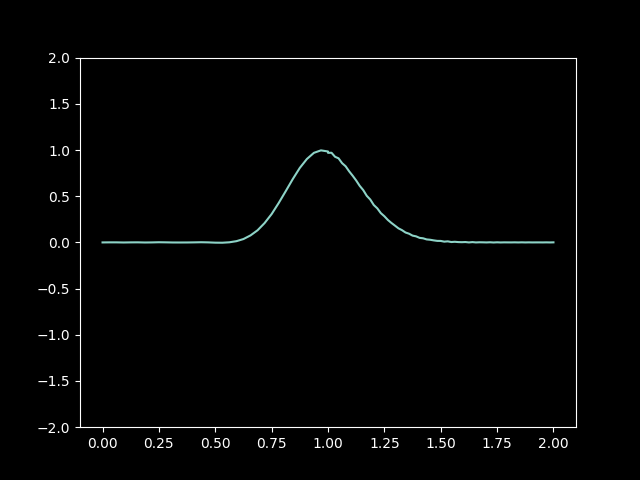

In [54]:
### -ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
surf = ax.plot(X,PHI[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_ylim(-2,2)
    surf = ax.plot(X,PHI[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=ct+1, interval=1, repeat = False)

## ---T---

In [8]:
xmax = 2
sep  = 1
cxl  = 2**6
cxr  = 2**7

tmax = 4
ct   = 2**9

D = SD.SBP42SAT_2BLOCKS(sep/cxl, (xmax-sep)/cxr, cxl+1, cxr+1, 1)
T = TD.RK4(tmax/ct, D)
BI = MBM.Block2Mesh(cxl, cxr, 0, xmax, sep,ct)
IC1 = np.zeros(BI.blockl.mesh.size)
IC1[-10:] = np.ones(1)
IC2 = np.zeros(BI.blockr.mesh.size)
IC2[:10] = np.ones(10)
BI.DefineIC(IC1,IC2)
X,PHI = BI.GetFullSolution()
T.diff(PHI)
Error1 = PHI[-1] - exp(-(X-1)**2/0.05)

<IPython.core.display.Javascript object>


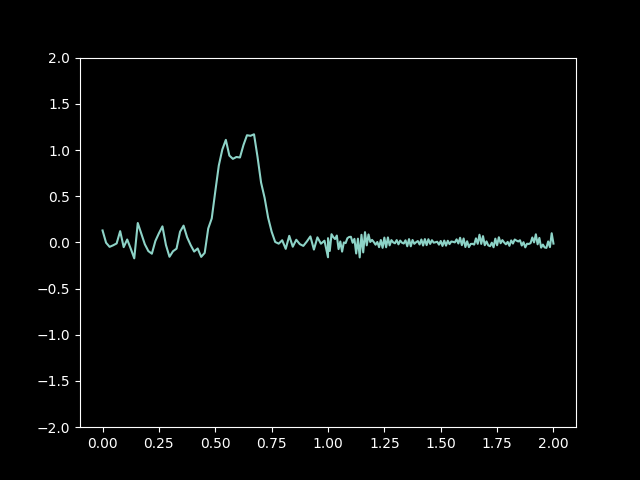

In [9]:
### -ВИЗУАЛИЗАЦИЯ-
fig, ax = plt.subplots()
plt.style.use('dark_background')
surf = ax.plot(X,PHI[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_ylim(-2,2)
    surf = ax.plot(X,PHI[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=ct+1, interval=1, repeat = False)